In [1]:
import pathlib
import cdmetadl.helpers.general_helpers
import cdmetadl.dataset
import cdmetadl.samplers
import cdmetadl.augmentation
from cdmetadl.notebooks.helpers import generate_edge_map_plot

%load_ext autoreload
%autoreload 2
%matplotlib inline  

path_to_dataset = "/fastdata/vilab24/meta-album"

dataset_path = pathlib.Path(path_to_dataset)
dataset_info_dict = cdmetadl.helpers.general_helpers.check_datasets(dataset_path, ["DOG"])

dataset = cdmetadl.dataset.ImageDataset("Dogs", dataset_info_dict["DOG"])

n_way_sampler = cdmetadl.samplers.ValueSampler(value=3)
k_shot_sampler = cdmetadl.samplers.ValueSampler(value=1)

task = dataset.generate_task(n_way_sampler, k_shot_sampler, query_size=4)

augmentation_size = {"threshold": 0.75,
                     "scale": 1,
                     "offset": 1,
                     "maximum": 2}

device = "cuda:1"
all_images = []


/fastdata/vilab25/cd-metadl-cyLvmR8c-py3.11/lib/python3.11/site-packages/controlnet_aux/mediapipe_face/mediapipe_face_common.py:7: UserWarning: The module 'mediapipe' is not installed. The package will have limited functionality. Please install it using the command: pip install 'mediapipe'
  warnings.warn(
/fastdata/vilab25/cd-metadl-cyLvmR8c-py3.11/lib/python3.11/site-packages/controlnet_aux/segment_anything/modeling/tiny_vit_sam.py:654: UserWarning: Overwriting tiny_vit_5m_224 in registry with controlnet_aux.segment_anything.modeling.tiny_vit_sam.tiny_vit_5m_224. This is because the name being registered conflicts with an existing name. Please check if this is not expected.
  return register_model(fn_wrapper)
/fastdata/vilab25/cd-metadl-cyLvmR8c-py3.11/lib/python3.11/site-packages/controlnet_aux/segment_anything/modeling/tiny_vit_sam.py:654: UserWarning: Overwriting tiny_vit_11m_224 in registry with controlnet_aux.segment_anything.modeling.tiny_vit_sam.tiny_vit_11m_224. This is becau

Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

Augmenting class:   0%|          | 0/3 [00:00<?, ?/s]

[<PIL.Image.Image image mode=RGB size=128x128 at 0x7FCEB216FFD0>]


Augmenting class:  33%|███▎      | 1/3 [00:02<00:05,  2.75s/]

[<PIL.Image.Image image mode=RGB size=128x128 at 0x7FCEB2202C50>]


Augmenting class:  67%|██████▋   | 2/3 [00:05<00:02,  2.73s/]

[<PIL.Image.Image image mode=RGB size=128x128 at 0x7FCEB2202FD0>]


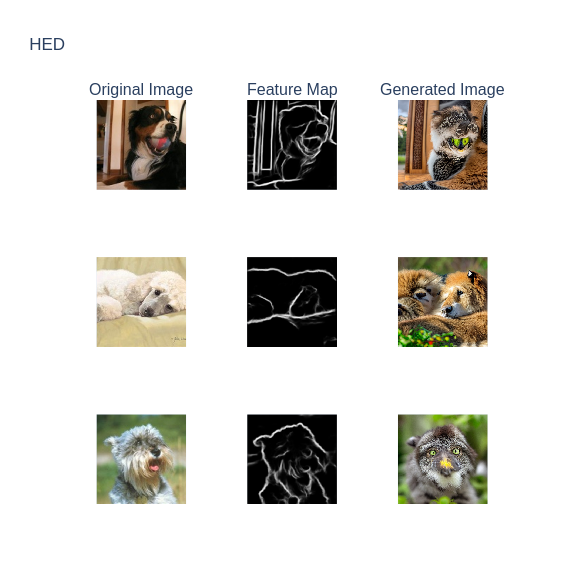

In [5]:
generative_augmentor = cdmetadl.augmentation.GenerativeAugmentation(augmentation_size,
                                                                    device=device,
                                                                    annotator_type="hed",
                                                                    keep_original_data=False,
                                                                    cache_images=True,
                                                                    guessing_mode=True,
                                                                    resize=False)
generate_edge_map_plot(generative_augmentor, task, "HED")

for image in generative_augmentor.generated_images:
    all_images.append(image)

Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

Augmenting class:   0%|          | 0/3 [00:00<?, ?/s]

[<PIL.Image.Image image mode=RGB size=512x512 at 0x7FCE046F7790>]


Augmenting class:  33%|███▎      | 1/3 [00:02<00:05,  2.99s/]

[<PIL.Image.Image image mode=RGB size=512x512 at 0x7FCEB2FAF010>]


Augmenting class:  67%|██████▋   | 2/3 [00:06<00:03,  3.07s/]

[<PIL.Image.Image image mode=RGB size=512x512 at 0x7FCEB2FACA90>]


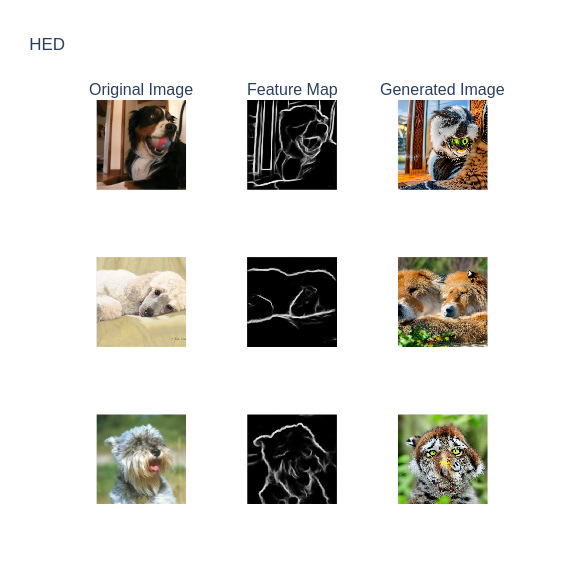

In [6]:
generative_augmentor = cdmetadl.augmentation.GenerativeAugmentation(augmentation_size,
                                                                    device=device,
                                                                    annotator_type="hed",
                                                                    keep_original_data=False,
                                                                    cache_images=True,
                                                                    guessing_mode=True)

generate_edge_map_plot(generative_augmentor, task, "HED")

for image in generative_augmentor.generated_images:
    all_images.append(image)

In [ ]:
all_images[1]

{'original_image': <PIL.Image.Image image mode=RGB size=512x512>,
 'feature_map': <PIL.Image.Image image mode=RGB size=512x512>,
 'generated_image': <PIL.Image.Image image mode=RGB size=512x512>,
 'Edge-Map': 'HED'}